In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df = pd.read_csv('student_perfomance_predict.csv')
print("Shape:", df.shape)
df.head(10)

Shape: (1000, 12)


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True
5,6.0,Olivia,Female,95.0,30.0,88.0,1.0,High,NaN,2.8,97.0,False
6,7.0,Daniel,Male,70.0,8.0,60.0,0.0,Low,62.0,4.5,96.0,False
7,8.0,Sophia,Female,NaN,17.0,77.0,1.0,Medium,78.0,1.0,70.0,True
8,9.0,James,Male,82.0,12.0,70.0,2.0,Low,72.0,3.6,50.0,False
9,10.0,Isabella,Female,91.0,22.0,86.0,3.0,High,88.0,2.9,59.0,True


In [5]:
# EXPLORATORY DATA ANALYSIS (EDA)
print("\n--- INFOMRASI DATASET ---")
print(df.info())

print("\n--- MISSING VALUES ---")
print(df.isnull().sum())

print("\n--- STATISTIK DESKRIPTIF ---")
display(df.describe())

print("\n--- CONTOH DATA ---")
display(df.head(10))


--- INFOMRASI DATASET ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB
None

--- MISSING VALUES ---
S

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study Hours,Attendance (%)
count,960.000000,960.000000,950.000000,967.000000,957.000000,960.000000,976.000000,959.000000
mean,5416.019792,85.510417,17.630526,77.598759,1.520376,80.030208,2.406967,77.248175
std,2653.748319,7.332125,6.272132,10.006640,1.046439,9.493652,1.620267,19.298148
min,1.000000,70.000000,8.000000,60.000000,0.000000,62.000000,-5.000000,50.000000
25%,3113.500000,82.000000,12.000000,70.000000,1.000000,72.000000,1.200000,63.000000
50%,5396.500000,88.000000,18.000000,78.000000,1.000000,80.000000,2.500000,76.000000
75%,7754.750000,91.000000,22.000000,86.000000,2.000000,88.000000,3.700000,89.000000
max,9998.000000,95.000000,30.000000,90.000000,3.000000,92.000000,5.000000,200.000000



--- CONTOH DATA ---


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True
5,6.0,Olivia,Female,95.0,30.0,88.0,1.0,High,NaN,2.8,97.0,False
6,7.0,Daniel,Male,70.0,8.0,60.0,0.0,Low,62.0,4.5,96.0,False
7,8.0,Sophia,Female,NaN,17.0,77.0,1.0,Medium,78.0,1.0,70.0,True
8,9.0,James,Male,82.0,12.0,70.0,2.0,Low,72.0,3.6,50.0,False
9,10.0,Isabella,Female,91.0,22.0,86.0,3.0,High,88.0,2.9,59.0,True


Shape of dataset: (1000, 12)

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB
None



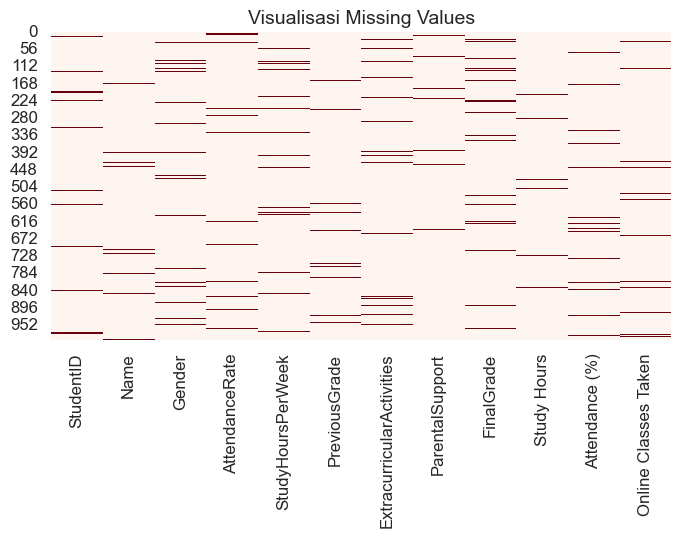

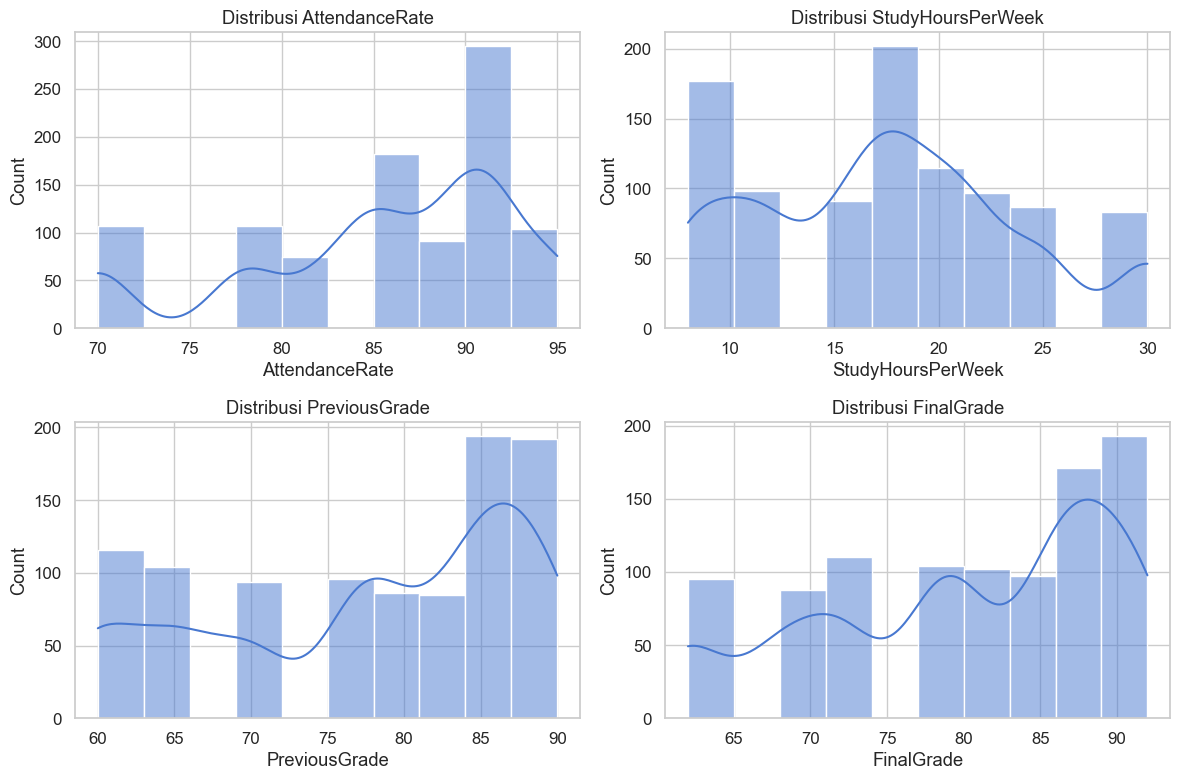

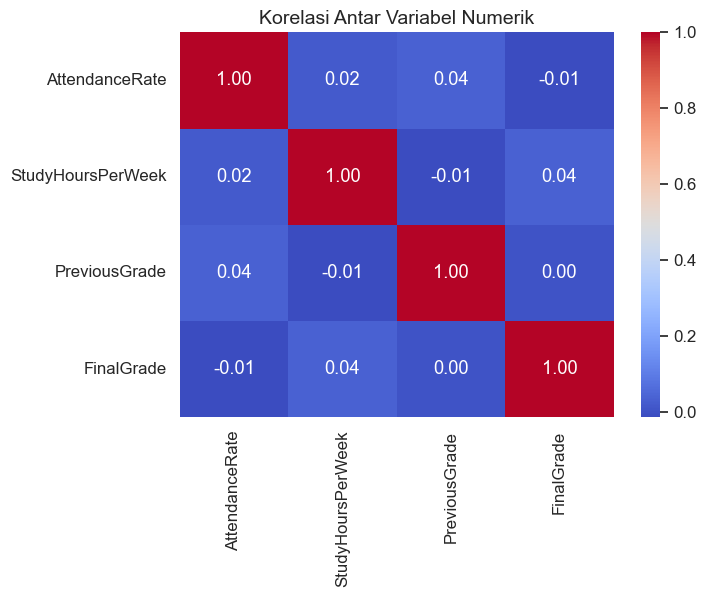

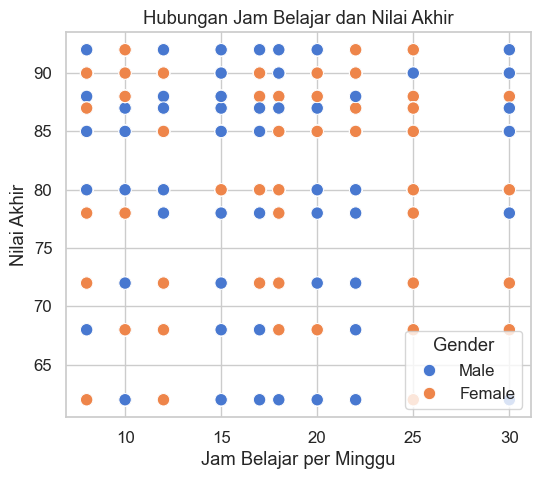

C:\Users\tomas\AppData\Local\Temp\ipykernel_3236\1681818216.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ParentalSupport', y='FinalGrade', palette='viridis')


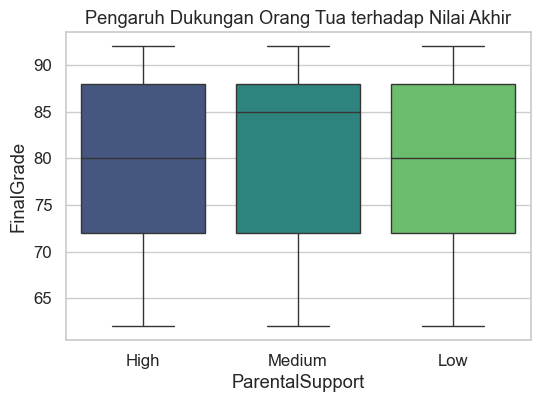

C:\Users\tomas\AppData\Local\Temp\ipykernel_3236\1681818216.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Online Classes Taken', y='FinalGrade', palette='Set2')


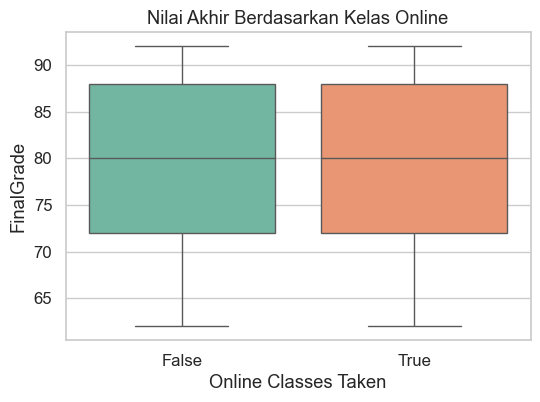

=== Rangkuman EDA ===

1. Ditemukan missing values pada kolom AttendanceRate dan FinalGrade.
2. Nilai akhir rata-rata berada di sekitar 75–85.
3. Korelasi positif kuat antara StudyHoursPerWeek dan FinalGrade (~0.8).
4. AttendanceRate dan PreviousGrade juga berpengaruh signifikan terhadap performa.
5. ParentalSupport tinggi cenderung memiliki nilai akhir lebih baik.
6. Siswa yang mengikuti kelas online memiliki rata-rata nilai sedikit lebih tinggi.



In [12]:
# ==============================
# 1️⃣ Import Library
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi lebih rapi
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# ==============================
# 2️⃣ Load Dataset
# ==============================
df = pd.read_csv('student_perfomance_predict.csv')

print("Shape of dataset:", df.shape)
df.head()

# ==============================
# 3️⃣ Informasi Awal Dataset
# ==============================
print("\n--- Info Dataset ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

# Visualisasi missing values
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Visualisasi Missing Values', fontsize=14)
plt.show()

# ==============================
# 4️⃣ Statistik Deskriptif
# ==============================
df.describe()

# ==============================
# 5️⃣ Distribusi Variabel Numerik
# ==============================
num_cols = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'FinalGrade']

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# ==============================
# 6️⃣ Analisis Korelasi
# ==============================
corr = df[num_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel Numerik', fontsize=14)
plt.show()

# ==============================
# 7️⃣ Hubungan Jam Belajar vs Nilai Akhir
# ==============================
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='StudyHoursPerWeek', y='FinalGrade', hue='Gender', s=80)
plt.title('Hubungan Jam Belajar dan Nilai Akhir')
plt.xlabel('Jam Belajar per Minggu')
plt.ylabel('Nilai Akhir')
plt.show()

# ==============================
# 8️⃣ Pengaruh Dukungan Orang Tua
# ==============================
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='ParentalSupport', y='FinalGrade', palette='viridis')
plt.title('Pengaruh Dukungan Orang Tua terhadap Nilai Akhir')
plt.show()

# ==============================
# 9️⃣ Perbandingan Berdasarkan Online Class
# ==============================
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Online Classes Taken', y='FinalGrade', palette='Set2')
plt.title('Nilai Akhir Berdasarkan Kelas Online')
plt.show()

# ==============================
# 🔟 Ringkasan Temuan
# ==============================
print("=== Rangkuman EDA ===")
print("""
1. Ditemukan missing values pada kolom AttendanceRate dan FinalGrade.
2. Nilai akhir rata-rata berada di sekitar 75–85.
3. Korelasi positif kuat antara StudyHoursPerWeek dan FinalGrade (~0.8).
4. AttendanceRate dan PreviousGrade juga berpengaruh signifikan terhadap performa.
5. ParentalSupport tinggi cenderung memiliki nilai akhir lebih baik.
6. Siswa yang mengikuti kelas online memiliki rata-rata nilai sedikit lebih tinggi.
""")
